# Fundamentos de Data Science
## Examen Elida Peña
## Requisitos:
Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado aquí.

**1.Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.

* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el type de dato.

* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**2.Exploración de datos con Python:**
* Crear dos types diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

* Crear dos types diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Entrega:**

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.

* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

* **NOTA:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

**Notas:**

* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.

* Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.

* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.

* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) **– PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA.** Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.

* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.

* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

In [35]:
#Importaciones de las librerías pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Lectura del archivo csv con pandas
#Ejemplo utilizado de la clase del 08/10/2021 https://drive.google.com/drive/folders/1fTyqpWdRh9rIKQCVYlc2eF2HGr8ttHaw
path = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data_frame = pd.read_csv(path, sep=',', header=0)
data_frame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**1.Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.

In [18]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Identificar registros duplicados (basados en todas las columnas)
duplicated_rows = data_frame.duplicated()
print(f"Total de registros duplicados: {duplicated_rows.sum()}")

# Mostrar los registros duplicados antes de eliminarlo
if duplicated_rows.sum() > 0:
    print("Registros duplicados:")
    print(data_frame[duplicated_rows])


Total de registros duplicados: 0


In [5]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Eliminar registros duplicados
data_frame = data_frame.drop_duplicates()

# Verificar que no haya duplicados después de la limpieza
print(f"Total de registros después de eliminar duplicados: {data_frame.shape[0]}")

Total de registros después de eliminar duplicados: 7043


In [19]:
data_frame.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [23]:
# Verificar los types de datos actuales
print(data_frame.dtypes)

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [24]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Ajustar tipos de datos para columnas categóricas a 'category'
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_columns:
    data_frame[col] = data_frame[col].astype('category')

# Convertir 'SeniorCitizen' y 'tenure' a int si no lo están ya
data_frame['SeniorCitizen'] = data_frame['SeniorCitizen'].astype(int)
data_frame['tenure'] = data_frame['tenure'].astype(int)

# Convertir 'MonthlyCharges' y 'TotalCharges' a float, manejando los valores no numéricos
data_frame['MonthlyCharges'] = pd.to_numeric(data_frame['MonthlyCharges'], errors='coerce')
data_frame['TotalCharges'] = pd.to_numeric(data_frame['TotalCharges'], errors='coerce')

# Revisar los tipos de datos después de la conversión
print(data_frame.dtypes)


customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [26]:
# #Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Revisar los valores únicos en cada columna categórica para identificar inconsistencias
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Imprimir los valores únicos para detectar posibles inconsistencias
for col in categorical_columns:
    print(f"Valores únicos antes en '{col}': {data_frame[col].unique()}")



Valores únicos antes en 'gender': ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Valores únicos antes en 'Partner': ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Valores únicos antes en 'Dependents': ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Valores únicos antes en 'PhoneService': ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Valores únicos antes en 'MultipleLines': ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
Valores únicos antes en 'InternetService': ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Valores únicos antes en 'OnlineSecurity': ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores únicos antes en 'OnlineBackup': ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores únicos antes en 'DeviceProtection': ['No', 'Yes', 'No internet service']
Categories (3, obj

In [27]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Unificar valores eliminando espacios y ajustando a minúsculas
for col in categorical_columns:
    data_frame[col] = data_frame[col].str.strip().str.lower()

# Ajustes específicos para unificar variaciones
data_frame['InternetService'] = data_frame['InternetService'].replace({
    'fiber optic': 'fiber optic',
    'dsl': 'dsl'
})

data_frame['MultipleLines'] = data_frame['MultipleLines'].replace({
    'no phone service': 'no phone service',
    'no phone service ': 'no phone service'  # Ajuste de espacio extra
})

data_frame['PaymentMethod'] = data_frame['PaymentMethod'].replace({
    'electronic check': 'electronic check',
    'bank transfer (automatic)': 'bank transfer (automatic)',
    'credit card (automatic)': 'credit card (automatic)',
    'mailed check': 'mailed check'
})

# Revisar nuevamente los valores únicos después de la limpieza
for col in categorical_columns:
    print(f"Valores únicos después en '{col}': {data_frame[col].unique()}")


Valores únicos después en 'gender': ['female' 'male']
Valores únicos después en 'Partner': ['yes' 'no']
Valores únicos después en 'Dependents': ['no' 'yes']
Valores únicos después en 'PhoneService': ['no' 'yes']
Valores únicos después en 'MultipleLines': ['no phone service' 'no' 'yes']
Valores únicos después en 'InternetService': ['dsl' 'fiber optic' 'no']
Valores únicos después en 'OnlineSecurity': ['no' 'yes' 'no internet service']
Valores únicos después en 'OnlineBackup': ['yes' 'no' 'no internet service']
Valores únicos después en 'DeviceProtection': ['no' 'yes' 'no internet service']
Valores únicos después en 'TechSupport': ['no' 'yes' 'no internet service']
Valores únicos después en 'StreamingTV': ['no' 'yes' 'no internet service']
Valores únicos después en 'StreamingMovies': ['no' 'yes' 'no internet service']
Valores únicos después en 'Contract': ['month-to-month' 'one year' 'two year']
Valores únicos después en 'PaperlessBilling': ['yes' 'no']
Valores únicos después en 'Payment

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [28]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# Calcular el número total de filas en el DataFrame
total_filas = data_frame.shape[0]

# Cantidad de valores no nulos en cada columna
qsna = total_filas - data_frame.isnull().sum(axis=0)

# Cantidad de valores nulos en cada columna
qna = data_frame.isnull().sum(axis=0)

# Porcentaje de valores nulos en cada columna
ppna = round(100 * (data_frame.isnull().sum(axis=0) / total_filas), 2)

# Crear un DataFrame para visualizar la información
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)

# Ordenar el DataFrame por el porcentaje de valores nulos de forma descendente
na = na.sort_values(by='Na en %', ascending=False)

# Mostrar la tabla de valores nulos
print(na)

                  datos sin NAs en q  Na en q  Na en %
TotalCharges                    7032       11     0.16
gender                          7043        0     0.00
SeniorCitizen                   7043        0     0.00
Partner                         7043        0     0.00
customerID                      7043        0     0.00
Dependents                      7043        0     0.00
tenure                          7043        0     0.00
MultipleLines                   7043        0     0.00
PhoneService                    7043        0     0.00
OnlineSecurity                  7043        0     0.00
OnlineBackup                    7043        0     0.00
DeviceProtection                7043        0     0.00
InternetService                 7043        0     0.00
TechSupport                     7043        0     0.00
StreamingTV                     7043        0     0.00
Contract                        7043        0     0.00
StreamingMovies                 7043        0     0.00
PaperlessB

In [30]:
# Ejercicio de guia "valores_nulos" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Rellenar los valores nulos en 'TotalCharges' con la media
mean_total_charges = data_frame['TotalCharges'].mean()
data_frame['TotalCharges'] = data_frame['TotalCharges'].fillna(mean_total_charges)
# Verificar nuevamente si hay valores faltantes después del relleno
print("Valores faltantes después del relleno:")
print(data_frame.isnull().sum())

Valores faltantes después del relleno:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [32]:
#Guia de ejemplo de clase de mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb
# 1. Identificar valores inapropiados para 'SeniorCitizen'
print("Valores únicos en 'SeniorCitizen':", data_frame['SeniorCitizen'].unique())

# No se encontraron valores inapropiados, por lo que no es necesario realizar ajustes.

# 2. Identificar valores fuera de rango en 'tenure'
print("Rango de 'tenure':", data_frame['tenure'].min(), "-", data_frame['tenure'].max())

# No se encontraron valores negativos ni fuera de rango, por lo que no es necesario realizar ajustes.

# 3. Identificar valores inusuales en 'MonthlyCharges' y 'TotalCharges'
print("Rango de 'MonthlyCharges':", data_frame['MonthlyCharges'].min(), "-", data_frame['MonthlyCharges'].max())
print("Rango de 'TotalCharges':", data_frame['TotalCharges'].min(), "-", data_frame['TotalCharges'].max())

# Los rangos de 'MonthlyCharges' y 'TotalCharges' son razonables, así que no se requiere corregir valores.


Valores únicos en 'SeniorCitizen': [0 1]
Rango de 'tenure': 0 - 72
Rango de 'MonthlyCharges': 18.25 - 118.75
Rango de 'TotalCharges': 18.8 - 8684.8


**2.Exploracion de datos con Python:**
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

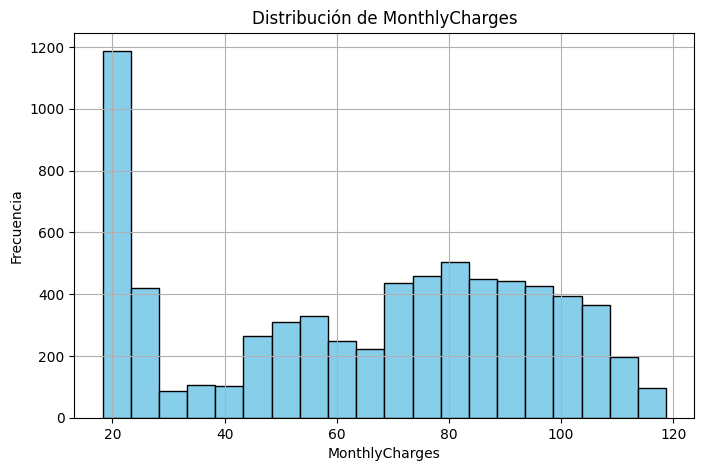

In [33]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# 1. Histograma de 'MonthlyCharges'
plt.figure(figsize=(8, 5))
plt.hist(data_frame['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Interpretación:
# El histograma muestra la distribución de los cargos mensuales (MonthlyCharges) de los clientes.
# Podemos observar si la mayoría de los clientes pagan un monto bajo, medio o alto por mes.
# Por ejemplo, si hay una mayor concentración de clientes pagando menos de $50, la empresa puede enfocarse en paquetes económicos.

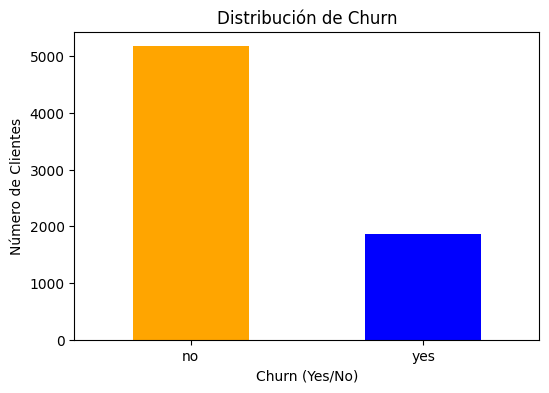

In [34]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# 2. Gráfico de barras de 'Churn'
plt.figure(figsize=(6, 4))
data_frame['Churn'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Distribución de Churn')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

# Interpretación:
# El gráfico de barras muestra la cantidad de clientes que abandonaron (Yes) y los que permanecieron (No).
# Esta visualización permite entender rápidamente la tasa de rotación (churn rate).
# Si la barra de 'Yes' es significativamente más baja que la de 'No', la empresa tiene una baja tasa de rotación.

* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

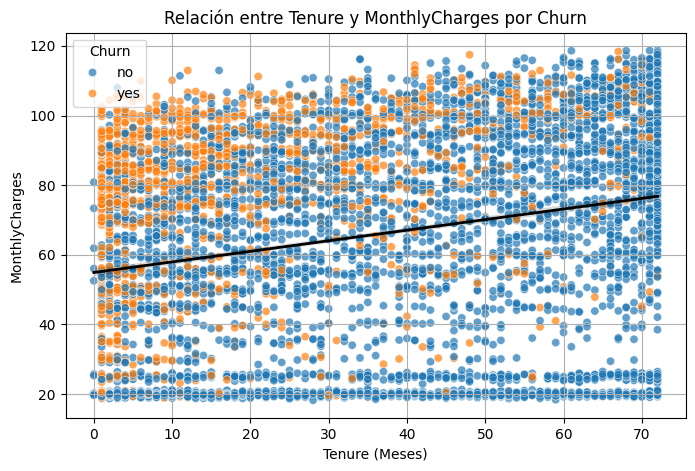

In [38]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# 1. Gráfico de dispersión entre 'tenure' y 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_frame, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
# Agregar una línea de regresión (sin diferenciar por 'Churn' para ver la tendencia general)
sns.regplot(data=data_frame, x='tenure', y='MonthlyCharges', scatter=False, color='black', line_kws={"linewidth": 2})
plt.title('Relación entre Tenure y MonthlyCharges por Churn')
plt.xlabel('Tenure (Meses)')
plt.ylabel('MonthlyCharges')
plt.grid(True)
plt.show()

# Interpretación:
# Este gráfico de dispersión muestra la relación entre el tiempo que un cliente ha estado con la empresa (tenure) y sus cargos mensuales (MonthlyCharges).
# Se ha añadido una línea de tendencia que muestra la relación general entre ambas variables.
# La línea de tendencia sugiere si hay un patrón creciente o decreciente en los cargos mensuales a medida que aumenta la permanencia.
# Podemos observar si los clientes con más tiempo tienden a pagar más o menos, y si hay diferencias en los patrones de abandono según la permanencia y los cargos.

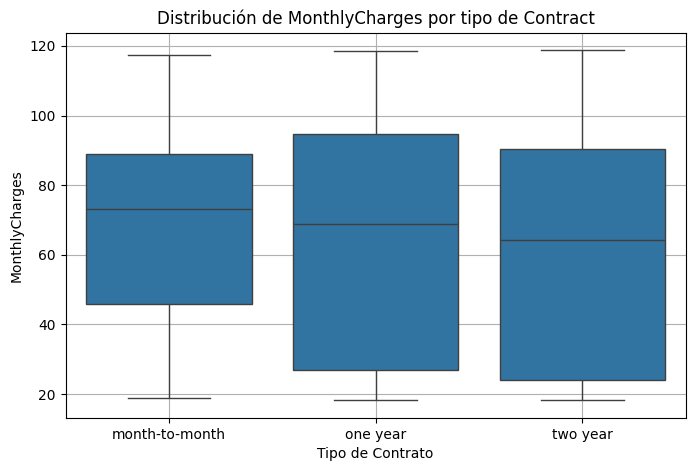

In [39]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# 2. Gráfico de caja (boxplot) de 'MonthlyCharges' agrupado por 'Contract'
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_frame, x='Contract', y='MonthlyCharges')
plt.title('Distribución de MonthlyCharges por tipo de Contract')
plt.xlabel('Tipo de Contrato')
plt.ylabel('MonthlyCharges')
plt.grid(True)
plt.show()

# Interpretación:
# El gráfico de caja muestra la distribución de los cargos mensuales (MonthlyCharges) para cada tipo de contrato.
# Esto nos permite ver la variabilidad y la mediana de los cargos en cada grupo de contrato (por mes, un año, dos años).
# Los contratos a más largo plazo podrían tener menor variabilidad y cargos más altos debido a la estabilidad del servicio.
# La longitud de las cajas también indica la dispersión de los datos en cada categoría de contrato.